In [6]:
import csv
import pandas as pd
import numpy as np
from tpot import TPOTClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import joblib

file_feature = "./csv/endometrium.csv"
file_train = "./csv/train.csv"
file_validate = "./csv/validation.csv"
file_test = "./csv/test.csv"

f = open(file_feature)
csv_f = csv.reader(f)
features = next(csv_f)
dataset = pd.read_csv(file_feature, names=features, usecols=range(1,6098), dtype=np.float64, skiprows=1, low_memory=False)
f = open(file_train)
csv_f = csv.reader(f)
features = next(csv_f)
dataset_train = pd.read_csv(file_train, names=features, usecols=range(1,1), dtype=np.float64, skiprows=1, low_memory=False)

with open('./csv/train.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    train_list = [row[1] for row in reader]
with open('./csv/validation.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    validation_list = [row['patient'] for row in reader]
with open('./csv/test.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    test_list = [row['patient'] for row in reader]

dataset['outcome'] = pd.to_numeric(dataset['outcome'],errors='coerce')
array_OG = dataset.values
print(array_OG.shape)
train_list = train_list[1:]
validation_list = validation_list[0:]
test_list = test_list[0:]
#print(test_list)
#print(train_list)
#print(validation_list)

def cat_str(num_list):
    n_list = []
    for i in num_list:
        temp = i[12:]
        n_list.append(temp)
    n_list = [int(x) for x in n_list]
    return n_list

train_list = cat_str(train_list)
validation_list = cat_str(validation_list)
test_list = cat_str(test_list)

#print(train_list)
#print(validation_list)
#print(test_list)
print(test_list)

train_feature = []
validate_feature = []
test_feature = []
count = 1
for i in range(len(array_OG)):
    num = i + 1
    if num in train_list:
        train_feature.append(array_OG[i])
    elif num in validation_list:
        validate_feature.append(array_OG[i])
    elif num in test_list:
        #print(count)
        count = count + 1
        test_feature.append(array_OG[i])
        #print(num)
        #print(array_OG[i,6096])
        
train_feature = np.array(train_feature)
validate_feature = np.array(validate_feature)
test_feature = np.array(test_feature)

train_feature = pd.DataFrame(train_feature)

train_feature.dropna(axis=1, thresh=2, inplace=True)
#train_feature.dropna(how='all',thresh = 20,inplace=True)
train_feature = np.array(train_feature)
wh_inf = np.isinf(train_feature)
train_feature[wh_inf]=0
wh_nan = np.isnan(train_feature)
train_feature[wh_nan]=0

validate_feature = pd.DataFrame(validate_feature)
validate_feature.dropna(axis=1, thresh=2, inplace=True)
#validate_feature.dropna(how='all',thresh = 20,inplace=True)
validate_feature = np.array(validate_feature)
wh_inf = np.isinf(validate_feature)
validate_feature[wh_inf]=0
wh_nan = np.isnan(validate_feature)
validate_feature[wh_nan]=0

test_feature = pd.DataFrame(test_feature)
test_feature.dropna(axis=1, thresh=2, inplace=True)
#test_feature.dropna(how='all',thresh = 20,inplace=True)
test_feature = np.array(test_feature)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0

#only use image features
X_train = train_feature[:,:6093]
Y_train = train_feature[:,6093]
Y_train = Y_train.astype('int32')

X_validate = validate_feature[:,:6093]
Y_validate = validate_feature[:,6093]
Y_validate = Y_validate.astype('int32')

X_test = test_feature[:,:6093]
Y_test = test_feature[:,6093]
Y_test = Y_test.astype('int32')
seed = 7

np.random.seed(seed)
np.random.shuffle(X_train) 
np.random.seed(seed)
np.random.shuffle(Y_train)

print(len(X_train[:,-1]))
print(len(Y_train[Y_train==0]))
print(Y_validate)
print(Y_test)

print(len(Y_test[Y_test==1]))
print(len(Y_validate[Y_validate==1]))
print(len(Y_train[Y_train==1]))

(849, 6097)
[121, 62, 193, 810, 288, 237, 40, 34, 179, 17, 258, 153, 623, 49, 285, 624, 93, 848, 640, 296, 203, 228, 212, 211, 115, 264, 2, 209, 174, 649, 108, 91, 122, 817, 180, 243, 166, 635, 700, 771, 349, 701, 585, 367, 432, 687, 356, 445, 658, 495, 745, 430, 569, 684, 599, 660, 546, 756, 733, 368, 805, 679, 415, 464, 399, 419, 402, 499, 688, 611, 448, 500, 414, 406, 665, 777, 720, 407, 664, 527, 523, 409, 710]
681
369
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1]
38
38
312


In [2]:
import csv
import pandas as pd
import numpy as np
from sklearn import model_selection
from tpot import TPOTClassifier
import tools

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
#from pyearth import Earth
from sklearn.cross_decomposition import PLSRegression


from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from skfeature.function.statistical_based import t_score
from skfeature.function.statistical_based import gini_index
from skfeature.function.similarity_based import fisher_score
from skfeature.function.similarity_based import reliefF

from sklearn.feature_selection import mutual_info_classif
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MIM
from skfeature.function.information_theoretical_based import MIFS
from skfeature.function.information_theoretical_based import MRMR
from skfeature.function.information_theoretical_based import CIFE
from skfeature.function.information_theoretical_based import JMI
from skfeature.function.information_theoretical_based import CMIM
from skfeature.function.information_theoretical_based import ICAP
from skfeature.function.information_theoretical_based import DISR

from scipy.stats import wilcoxon

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
# CLASSIFICATION METHODS
models = []
models.append(('GLM', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('BY', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('BAG', BaggingClassifier()))
models.append(('NNet', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('BST', AdaBoostClassifier()))

seed = 7

In [62]:
#crossvalidation on trainset and select the best model on validation set, test on test set
import xlwt

num_fea = 20
sel = []
sel.append(('CHSQ', SelectKBest(chi2, k=num_fea)))
sel.append(('ANOVA', SelectKBest(f_classif, k=num_fea)))
sel.append(('TSCR', SelectKBest(t_score.t_score, k=num_fea)))
sel.append(('FSCR', SelectKBest(fisher_score.fisher_score, k=num_fea)))
sel.append(('RELF', SelectKBest(reliefF.reliefF, k=num_fea)))

output = open("endohand20.txt","w")
file = 'fea20.xls'


book = xlwt.Workbook()
sheet = book.add_sheet('train_avg_auc')
sheet_train = book.add_sheet('train_auc')
sheet_validate = book.add_sheet('validate_auc')
sheet_test = book.add_sheet('test_auc')


from sklearn.externals import joblib
#from imblearn.over_sampling import SMOTE
# 定义SMOTE模型，random_state相当于随机数种子的作用
kfold = model_selection.KFold(n_splits=5, random_state=seed)
r = 0
c = 0
for name, model in models:
    for kind, selection in sel:
        pipe = make_pipeline(MinMaxScaler(), selection, model)
        cv_results = model_selection.cross_val_score(pipe, X_train, Y_train, scoring='roc_auc', cv=kfold)
        
        sheet.write(r,c,cv_results.mean())

        print("###########################################")
        msg = "%s %s %s: %f (%f)\n" % ("TRAIN_AUC", kind, name, cv_results.mean(), cv_results.std())
        print(msg)
        output.write(msg)
        pipe.fit(X_train,Y_train)
        joblib.dump(pipe,'./handpkl/Endo'+name+kind+'20.pkl')
        
        Y_pred = pipe.predict(X_train)
        print("Accuracy: " + repr(accuracy_score(Y_train, Y_pred)))
        print("Average Precision Score: " + repr(average_precision_score(Y_train, Y_pred)))
        print("Kappa: " + repr(cohen_kappa_score(Y_train, Y_pred)))
        print("Hamming Loss: " + repr(hamming_loss(Y_train, Y_pred)))
        print("AUC: " + repr(roc_auc_score(Y_train, Y_pred)))
        print("Sensitivity: " + repr(recall_score(Y_train, Y_pred)))
        tn, fp, fn, tp = confusion_matrix(Y_train, Y_pred).ravel()
        print("Specificity: " + repr(tn / (tn + fp)))
        
        sheet_train.write(r,c,roc_auc_score(Y_train, Y_pred))

        Y_pred = pipe.predict(X_validate)
        print("Accuracy: " + repr(accuracy_score(Y_validate, Y_pred)))
        print("Average Precision Score: " + repr(average_precision_score(Y_validate, Y_pred)))
        print("Kappa: " + repr(cohen_kappa_score(Y_validate, Y_pred)))
        print("Hamming Loss: " + repr(hamming_loss(Y_validate, Y_pred)))
        print("AUC"+repr(roc_auc_score(Y_validate,Y_pred)))
        print("Sensitivity" + repr(recall_score(Y_validate,Y_pred)))
        tn,fp,fn,tp = confusion_matrix(Y_validate,Y_pred).ravel()
        print("Specificity" + repr(tn/(tn+fp)))
        
        sheet_validate.write(r,c,roc_auc_score(Y_validate,Y_pred))
        
        Y_pred = pipe.predict(X_test)
        print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
        print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
        print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
        print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
        print("AUC: " + repr(roc_auc_score(Y_test, Y_pred)))
        print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
        tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
        print("Specificity" + repr(tn/(tn+fp)))
        
        sheet_test.write(r,c,roc_auc_score(Y_test,Y_pred))
        
        r = r + 1
    c = c + 1
    r = 0

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

###########################################
TRAIN_AUC CHSQ GLM: 0.801766 (0.029354)

Accuracy: 0.7227272727272728
Average Precision Score: 0.6157791663605616
Kappa: 0.44038771614433714
Hamming Loss: 0.2772727272727273
AUC: 0.7205412830412832
Sensitivity: 0.6993243243243243
Specificity: 0.7417582417582418
Accuracy: 0.7831325301204819
Average Precision Score: 0.6884908053265694
Kappa: 0.564938846825859
Hamming Loss: 0.21686746987951808
AUC0.7836257309941521
Sensitivity0.7894736842105263
Specificity0.7777777777777778
Accuracy: 0.6385542168674698
Average Precision Score: 0.5503064891143522
Kappa: 0.28653295128939826
Hamming Loss: 0.3614457831325301
AUC: 0.6461988304093568
Sensitivity0.7368421052631579
Specificity0.5555555555555556


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib

###########################################
TRAIN_AUC ANOVA GLM: 0.799216 (0.021344)

Accuracy: 0.7348484848484849
Average Precision Score: 0.6286900536900537
Kappa: 0.4641763625229639
Hamming Loss: 0.26515151515151514
AUC: 0.7321614196614197
Sensitivity: 0.706081081081081
Specificity: 0.7582417582417582
Accuracy: 0.7710843373493976
Average Precision Score: 0.6759101182056161
Kappa: 0.5398307557630581
Hamming Loss: 0.2289156626506024
AUC0.7704678362573099
Sensitivity0.7631578947368421
Specificity0.7777777777777778
Accuracy: 0.7349397590361446
Average Precision Score: 0.6346630541303971
Kappa: 0.47255921432697867
Hamming Loss: 0.26506024096385544
AUC: 0.7391812865497076
Sensitivity0.7894736842105263
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

###########################################
TRAIN_AUC TSCR GLM: 0.797334 (0.021606)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7363636363636363
Average Precision Score: 0.6301504914004914
Kappa: 0.467741935483871
Hamming Loss: 0.2636363636363636
AUC: 0.7341661716661716
Sensitivity: 0.7128378378378378
Specificity: 0.7554945054945055
Accuracy: 0.7710843373493976
Average Precision Score: 0.6759101182056161
Kappa: 0.5398307557630581
Hamming Loss: 0.2289156626506024
AUC0.7704678362573099
Sensitivity0.7631578947368421
Specificity0.7777777777777778
Accuracy: 0.7469879518072289
Average Precision Score: 0.6463256534911577
Kappa: 0.49754972614586335
Hamming Loss: 0.25301204819277107
AUC: 0.7523391812865498
Sensitivity0.8157894736842105
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

###########################################
TRAIN_AUC FSCR GLM: 0.799216 (0.021344)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7348484848484849
Average Precision Score: 0.6286900536900537
Kappa: 0.4641763625229639
Hamming Loss: 0.26515151515151514
AUC: 0.7321614196614197
Sensitivity: 0.706081081081081
Specificity: 0.7582417582417582
Accuracy: 0.7710843373493976
Average Precision Score: 0.6759101182056161
Kappa: 0.5398307557630581
Hamming Loss: 0.2289156626506024
AUC0.7704678362573099
Sensitivity0.7631578947368421
Specificity0.7777777777777778
Accuracy: 0.7349397590361446
Average Precision Score: 0.6346630541303971
Kappa: 0.47255921432697867
Hamming Loss: 0.26506024096385544
AUC: 0.7391812865497076
Sensitivity0.7894736842105263
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

###########################################
TRAIN_AUC RELF GLM: 0.840573 (0.041726)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy: 0.7878787878787878
Average Precision Score: 0.6893118303832588
Kappa: 0.5709350273041347
Hamming Loss: 0.21212121212121213
AUC: 0.7852873477873478
Sensitivity: 0.7601351351351351
Specificity: 0.8104395604395604
Accuracy: 0.8674698795180723
Average Precision Score: 0.7901696645374824
Kappa: 0.7346701540249927
Hamming Loss: 0.13253012048192772
AUC0.8695906432748538
Sensitivity0.8947368421052632
Specificity0.8444444444444444
Accuracy: 0.7710843373493976
Average Precision Score: 0.6699834050648282
Kappa: 0.5472293999425781
Hamming Loss: 0.2289156626506024
AUC: 0.7786549707602339
Sensitivity0.868421052631579
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


###########################################
TRAIN_AUC CHSQ LDA: 0.787205 (0.028707)

Accuracy: 0.7318181818181818
Average Precision Score: 0.6253664960186699
Kappa: 0.45839437716744247
Hamming Loss: 0.2681818181818182
AUC: 0.7294141669141669
Sensitivity: 0.706081081081081
Specificity: 0.7527472527472527
Accuracy: 0.7710843373493976
Average Precision Score: 0.6806504212338074
Kappa: 0.5360400117681672
Hamming Loss: 0.2289156626506024
AUC0.7663742690058479
Sensitivity0.7105263157894737
Specificity0.8222222222222222
Accuracy: 0.6626506024096386
Average Precision Score: 0.568534905170923
Kappa: 0.32871172732524556
Hamming Loss: 0.3373493975903614
AUC: 0.666374269005848
Sensitivity0.7105263157894737
Specificity0.6222222222222222


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: Use

###########################################
TRAIN_AUC ANOVA LDA: 0.790027 (0.021915)

Accuracy: 0.740909090909091
Average Precision Score: 0.6353419675453573
Kappa: 0.47609321325782195
Hamming Loss: 0.2590909090909091
AUC: 0.7379714879714878
Sensitivity: 0.7094594594594594
Specificity: 0.7664835164835165
Accuracy: 0.7951807228915663
Average Precision Score: 0.7036729915613873
Kappa: 0.5882696235774729
Hamming Loss: 0.20481927710843373
AUC0.7947368421052632
Sensitivity0.7894736842105263
Specificity0.8
Accuracy: 0.7469879518072289
Average Precision Score: 0.6463256534911577
Kappa: 0.49754972614586335
Hamming Loss: 0.25301204819277107
AUC: 0.7523391812865498
Sensitivity0.8157894736842105
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


###########################################
TRAIN_AUC TSCR LDA: 0.785947 (0.022415)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy: 0.7424242424242424
Average Precision Score: 0.6369256618412024
Kappa: 0.47932135432135436
Hamming Loss: 0.25757575757575757
AUC: 0.7396606771606771
Sensitivity: 0.7128378378378378
Specificity: 0.7664835164835165
Accuracy: 0.7831325301204819
Average Precision Score: 0.6884908053265694
Kappa: 0.564938846825859
Hamming Loss: 0.21686746987951808
AUC0.7836257309941521
Sensitivity0.7894736842105263
Specificity0.7777777777777778
Accuracy: 0.7228915662650602
Average Precision Score: 0.6227013316423589
Kappa: 0.44969731911213606
Hamming Loss: 0.27710843373493976
AUC: 0.7280701754385965
Sensitivity0.7894736842105263
Specificity0.6666666666666666


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


###########################################
TRAIN_AUC FSCR LDA: 0.790027 (0.021915)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy: 0.740909090909091
Average Precision Score: 0.6353419675453573
Kappa: 0.47609321325782195
Hamming Loss: 0.2590909090909091
AUC: 0.7379714879714878
Sensitivity: 0.7094594594594594
Specificity: 0.7664835164835165
Accuracy: 0.7951807228915663
Average Precision Score: 0.7036729915613873
Kappa: 0.5882696235774729
Hamming Loss: 0.20481927710843373
AUC0.7947368421052632
Sensitivity0.7894736842105263
Specificity0.8
Accuracy: 0.7469879518072289
Average Precision Score: 0.6463256534911577
Kappa: 0.49754972614586335
Hamming Loss: 0.25301204819277107
AUC: 0.7523391812865498
Sensitivity0.8157894736842105
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


###########################################
TRAIN_AUC RELF LDA: 0.836495 (0.038216)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy: 0.7833333333333333
Average Precision Score: 0.6821375121049388
Kappa: 0.5635324367820345
Hamming Loss: 0.21666666666666667
AUC: 0.7827442827442826
Sensitivity: 0.777027027027027
Specificity: 0.7884615384615384
Accuracy: 0.891566265060241
Average Precision Score: 0.8282197616376438
Kappa: 0.7820250948351327
Hamming Loss: 0.10843373493975904
AUC0.891812865497076
Sensitivity0.8947368421052632
Specificity0.8888888888888888
Accuracy: 0.7710843373493976
Average Precision Score: 0.6699834050648282
Kappa: 0.5472293999425781
Hamming Loss: 0.2289156626506024
AUC: 0.7786549707602339
Sensitivity0.868421052631579
Specificity0.6888888888888889
###########################################
TRAIN_AUC CHSQ KNN: 0.732322 (0.038023)

Accuracy: 0.7787878787878788
Average Precision Score: 0.677677108927109
Kappa: 0.553392658509455
Hamming Loss: 0.22121212121212122
AUC: 0.7770455895455896
Sensitivity: 0.7601351351351351
Specificity: 0.7939560439560439
Accuracy: 0.7108433734939759
Average Precision S

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning:

###########################################
TRAIN_AUC ANOVA KNN: 0.745656 (0.020767)

Accuracy: 0.793939393939394
Average Precision Score: 0.6960303882283747
Kappa: 0.5837198085556339
Hamming Loss: 0.20606060606060606
AUC: 0.7920441045441046
Sensitivity: 0.7736486486486487
Specificity: 0.8104395604395604
Accuracy: 0.7228915662650602
Average Precision Score: 0.6265513180541716
Kappa: 0.4383642247719918
Hamming Loss: 0.27710843373493976
AUC0.7178362573099415
Sensitivity0.6578947368421053
Specificity0.7777777777777778
Accuracy: 0.7831325301204819
Average Precision Score: 0.6884908053265694
Kappa: 0.564938846825859
Hamming Loss: 0.21686746987951808
AUC: 0.7836257309941521
Sensitivity0.7894736842105263
Specificity0.7777777777777778
###########################################
TRAIN_AUC TSCR KNN: 0.746559 (0.015662)

Accuracy: 0.7984848484848485
Average Precision Score: 0.7014067503197938
Kappa: 0.5930308031823155
Hamming Loss: 0.2015151515151515
AUC: 0.7967961092961093
Sensitivity: 0.7804054

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning:

###########################################
TRAIN_AUC ANOVA DT: 0.576475 (0.070625)

Accuracy: 1.0
Average Precision Score: 1.0
Kappa: 1.0
Hamming Loss: 0.0
AUC: 1.0
Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.6987951807228916
Average Precision Score: 0.600718664130205
Kappa: 0.39451415231981324
Hamming Loss: 0.30120481927710846
AUC0.6976608187134503
Sensitivity0.6842105263157895
Specificity0.7111111111111111
Accuracy: 0.6265060240963856
Average Precision Score: 0.5398999506799126
Kappa: 0.2582876909772268
Hamming Loss: 0.37349397590361444
AUC: 0.6309941520467836
Sensitivity0.6842105263157895
Specificity0.5777777777777777
###########################################
TRAIN_AUC TSCR DT: 0.592429 (0.028024)

Accuracy: 1.0
Average Precision Score: 1.0
Kappa: 1.0
Hamming Loss: 0.0
AUC: 1.0
Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.7349397590361446
Average Precision Score: 0.6373777659112906
Kappa: 0.4660818713450292
Hamming Loss: 0.26506024096385544
AUC0.7330409356725145
Sensitivity0.7

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning:

###########################################
TRAIN_AUC ANOVA BY: 0.800655 (0.023948)

Accuracy: 0.7242424242424242
Average Precision Score: 0.6165063765063764
Kappa: 0.4519072823507939
Hamming Loss: 0.27575757575757576
AUC: 0.7298039798039799
Sensitivity: 0.7837837837837838
Specificity: 0.6758241758241759
Accuracy: 0.7951807228915663
Average Precision Score: 0.6954492100541023
Kappa: 0.5948894631065174
Hamming Loss: 0.20481927710843373
AUC0.8029239766081873
Sensitivity0.8947368421052632
Specificity0.7111111111111111
Accuracy: 0.6867469879518072
Average Precision Score: 0.5905077801082874
Kappa: 0.38658328595793057
Hamming Loss: 0.3132530120481928
AUC: 0.6988304093567251
Sensitivity0.8421052631578947
Specificity0.5555555555555556
###########################################
TRAIN_AUC TSCR BY: 0.796557 (0.023612)

Accuracy: 0.7181818181818181
Average Precision Score: 0.6107336099139378
Kappa: 0.44262830990519775
Hamming Loss: 0.2818181818181818
AUC: 0.7262028512028511
Sensitivity: 0.804054

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/

###########################################
TRAIN_AUC CHSQ SVM: 0.800527 (0.030110)

Accuracy: 0.7227272727272728
Average Precision Score: 0.6159136409136409
Kappa: 0.43968156766687083
Hamming Loss: 0.2772727272727273
AUC: 0.7199101574101574
Sensitivity: 0.6925675675675675
Specificity: 0.7472527472527473
Accuracy: 0.7831325301204819
Average Precision Score: 0.6967716065500391
Kappa: 0.5595518867924527
Hamming Loss: 0.21686746987951808
AUC0.777485380116959
Sensitivity0.7105263157894737
Specificity0.8444444444444444
Accuracy: 0.6385542168674698
Average Precision Score: 0.5495781754018362
Kappa: 0.2836593785960875
Hamming Loss: 0.3614457831325301
AUC: 0.6441520467836257
Sensitivity0.7105263157894737
Specificity0.5777777777777777


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users

###########################################
TRAIN_AUC ANOVA SVM: 0.799424 (0.024473)

Accuracy: 0.7318181818181818
Average Precision Score: 0.6254618254618255
Kappa: 0.4580526638089406
Hamming Loss: 0.2681818181818182
AUC: 0.729098604098604
Sensitivity: 0.7027027027027027
Specificity: 0.7554945054945055
Accuracy: 0.7469879518072289
Average Precision Score: 0.6471811358039257
Kappa: 0.49551374819102756
Hamming Loss: 0.25301204819277107
AUC0.7502923976608188
Sensitivity0.7894736842105263
Specificity0.7111111111111111
Accuracy: 0.7469879518072289
Average Precision Score: 0.6463256534911577
Kappa: 0.49754972614586335
Hamming Loss: 0.25301204819277107
AUC: 0.7523391812865498
Sensitivity0.8157894736842105
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/

###########################################
TRAIN_AUC TSCR SVM: 0.795561 (0.023213)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7303030303030303
Average Precision Score: 0.6237213349713349
Kappa: 0.4555061179087876
Hamming Loss: 0.2696969696969697
AUC: 0.7280405405405406
Sensitivity: 0.706081081081081
Specificity: 0.75
Accuracy: 0.7349397590361446
Average Precision Score: 0.6373777659112906
Kappa: 0.4660818713450292
Hamming Loss: 0.26506024096385544
AUC0.7330409356725145
Sensitivity0.7105263157894737
Specificity0.7555555555555555
Accuracy: 0.7469879518072289
Average Precision Score: 0.6463256534911577
Kappa: 0.49754972614586335
Hamming Loss: 0.25301204819277107
AUC: 0.7523391812865498
Sensitivity0.8157894736842105
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/

###########################################
TRAIN_AUC FSCR SVM: 0.799424 (0.024473)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7318181818181818
Average Precision Score: 0.6254618254618255
Kappa: 0.4580526638089406
Hamming Loss: 0.2681818181818182
AUC: 0.729098604098604
Sensitivity: 0.7027027027027027
Specificity: 0.7554945054945055
Accuracy: 0.7469879518072289
Average Precision Score: 0.6471811358039257
Kappa: 0.49551374819102756
Hamming Loss: 0.25301204819277107
AUC0.7502923976608188
Sensitivity0.7894736842105263
Specificity0.7111111111111111
Accuracy: 0.7469879518072289
Average Precision Score: 0.6463256534911577
Kappa: 0.49754972614586335
Hamming Loss: 0.25301204819277107
AUC: 0.7523391812865498
Sensitivity0.8157894736842105
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/

###########################################
TRAIN_AUC RELF SVM: 0.814754 (0.049154)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.759090909090909
Average Precision Score: 0.6541504380732677
Kappa: 0.515306593751732
Hamming Loss: 0.2409090909090909
AUC: 0.7588728838728839
Sensitivity: 0.7567567567567568
Specificity: 0.760989010989011
Accuracy: 0.8433734939759037
Average Precision Score: 0.7632473212688812
Kappa: 0.6851473592063029
Hamming Loss: 0.1566265060240964
AUC0.8432748538011696
Sensitivity0.8421052631578947
Specificity0.8444444444444444
Accuracy: 0.7710843373493976
Average Precision Score: 0.669030579892071
Kappa: 0.5490420360308836
Hamming Loss: 0.2289156626506024
AUC: 0.780701754385965
Sensitivity0.8947368421052632
Specificity0.6666666666666666
###########################################
TRAIN_AUC CHSQ BAG: 0.752576 (0.019959)

Accuracy: 0.9803030303030303
Average Precision Score: 0.9713378052478397
Kappa: 0.9600952504976467
Hamming Loss: 0.019696969696969695
AUC: 0.978987228987229
Sensitivity: 0.9662162162162162
Specificity: 0.9917582417582418
Accuracy: 0.6385542168674698
Average Precision Sc

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)


###########################################
TRAIN_AUC ANOVA BAG: 0.712049 (0.031754)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)


Accuracy: 0.9833333333333333
Average Precision Score: 0.9780011243425878
Kappa: 0.966213071725088
Hamming Loss: 0.016666666666666666
AUC: 0.9817344817344817
Sensitivity: 0.9662162162162162
Specificity: 0.9972527472527473
Accuracy: 0.6626506024096386
Average Precision Score: 0.5674187979990135
Kappa: 0.31767469172049323
Hamming Loss: 0.3373493975903614
AUC0.658187134502924
Sensitivity0.6052631578947368
Specificity0.7111111111111111
Accuracy: 0.6385542168674698
Average Precision Score: 0.5465722539279927
Kappa: 0.2689371697005285
Hamming Loss: 0.3614457831325301
AUC: 0.6339181286549708
Sensitivity0.5789473684210527
Specificity0.6888888888888889
###########################################
TRAIN_AUC TSCR BAG: 0.721430 (0.037734)

Accuracy: 0.9818181818181818
Average Precision Score: 0.9761379386379386
Kappa: 0.9631298648095044
Hamming Loss: 0.01818181818181818
AUC: 0.9800452925452925
Sensitivity: 0.9628378378378378
Specificity: 0.9972527472527473
Accuracy: 0.6987951807228916
Average Precis

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

###########################################
TRAIN_AUC CHSQ NNet: 0.801861 (0.027765)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)


Accuracy: 0.7378787878787879
Average Precision Score: 0.6309670151941444
Kappa: 0.473621125228199
Hamming Loss: 0.26212121212121214
AUC: 0.7383798633798634
Sensitivity: 0.7432432432432432
Specificity: 0.7335164835164835
Accuracy: 0.7831325301204819
Average Precision Score: 0.6884908053265694
Kappa: 0.564938846825859
Hamming Loss: 0.21686746987951808
AUC0.7836257309941521
Sensitivity0.7894736842105263
Specificity0.7777777777777778
Accuracy: 0.6626506024096386
Average Precision Score: 0.5695082963432678
Kappa: 0.33409742120343844
Hamming Loss: 0.3373493975903614
AUC: 0.6704678362573099
Sensitivity0.7631578947368421
Specificity0.5777777777777777


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Con

###########################################
TRAIN_AUC ANOVA NNet: 0.801419 (0.020823)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.7363636363636363
Average Precision Score: 0.6298509739686211
Kappa: 0.4687465304762962
Hamming Loss: 0.2636363636363636
AUC: 0.7351128601128601
Sensitivity: 0.722972972972973
Specificity: 0.7472527472527473
Accuracy: 0.7831325301204819
Average Precision Score: 0.6864676752121268
Kappa: 0.5667053364269141
Hamming Loss: 0.21686746987951808
AUC0.7856725146198831
Sensitivity0.8157894736842105
Specificity0.7555555555555555
Accuracy: 0.7349397590361446
Average Precision Score: 0.6341085164456454
Kappa: 0.47468354430379744
Hamming Loss: 0.26506024096385544
AUC: 0.7412280701754387
Sensitivity0.8157894736842105
Specificity0.6666666666666666


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


###########################################
TRAIN_AUC TSCR NNet: 0.797784 (0.020465)

Accuracy: 0.7287878787878788
Average Precision Score: 0.6215982215982216
Kappa: 0.4550235261555494
Hamming Loss: 0.27121212121212124
AUC: 0.728875853875854
Sensitivity: 0.7297297297297297
Specificity: 0.728021978021978
Accuracy: 0.7710843373493976
Average Precision Score: 0.6724646443792305
Kappa: 0.5435600578871201
Hamming Loss: 0.2289156626506024
AUC0.774561403508772
Sensitivity0.8157894736842105
Specificity0.7333333333333333
Accuracy: 0.7228915662650602
Average Precision Score: 0.6224112575722824
Kappa: 0.4519092736146999
Hamming Loss: 0.27710843373493976
AUC: 0.7301169590643274
Sensitivity0.8157894736842105
Specificity0.6444444444444445


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

###########################################
TRAIN_AUC FSCR NNet: 0.802004 (0.021671)

Accuracy: 0.7287878787878788
Average Precision Score: 0.6215406903892708
Kappa: 0.455365210496229
Hamming Loss: 0.27121212121212124
AUC: 0.7291914166914166
Sensitivity: 0.7331081081081081
Specificity: 0.7252747252747253
Accuracy: 0.7831325301204819
Average Precision Score: 0.6847293480140658
Kappa: 0.5684575389948008
Hamming Loss: 0.21686746987951808
AUC0.787719298245614
Sensitivity0.8421052631578947
Specificity0.7333333333333333
Accuracy: 0.6987951807228916
Average Precision Score: 0.6004490572386216
Kappa: 0.4066342579353732
Hamming Loss: 0.30120481927710846
AUC: 0.7078947368421054
Sensitivity0.8157894736842105
Specificity0.6


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

###########################################
TRAIN_AUC RELF NNet: 0.853115 (0.032895)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.8015151515151515
Average Precision Score: 0.7061756994350852
Kappa: 0.5983909626354025
Hamming Loss: 0.1984848484848485
AUC: 0.7989122364122364
Sensitivity: 0.7736486486486487
Specificity: 0.8241758241758241
Accuracy: 0.8674698795180723
Average Precision Score: 0.7950587776206038
Kappa: 0.7335862270207179
Hamming Loss: 0.13253012048192772
AUC0.8675438596491228
Sensitivity0.868421052631579
Specificity0.8666666666666667
Accuracy: 0.7831325301204819
Average Precision Score: 0.6864676752121268
Kappa: 0.5667053364269141
Hamming Loss: 0.21686746987951808
AUC: 0.7856725146198831
Sensitivity0.8157894736842105
Specificity0.7555555555555555


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


###########################################
TRAIN_AUC CHSQ RF: 0.742140 (0.038085)

Accuracy: 0.9772727272727273
Average Precision Score: 0.966178029240313
Kappa: 0.9539560582665153
Hamming Loss: 0.022727272727272728


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUC: 0.9759244134244134
Sensitivity: 0.9628378378378378
Specificity: 0.989010989010989
Accuracy: 0.7108433734939759
Average Precision Score: 0.6192929613189601
Kappa: 0.4053731343283582
Hamming Loss: 0.2891566265060241
AUC0.6985380116959066
Sensitivity0.5526315789473685
Specificity0.8444444444444444
Accuracy: 0.7228915662650602
Average Precision Score: 0.625374899312756
Kappa: 0.44066803398769405
Hamming Loss: 0.27710843373493976
AUC: 0.7198830409356725
Sensitivity0.6842105263157895
Specificity0.7555555555555555


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)


###########################################
TRAIN_AUC ANOVA RF: 0.726518 (0.033148)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)


Accuracy: 0.9818181818181818
Average Precision Score: 0.9732006693213591
Kappa: 0.9631764924679189
Hamming Loss: 0.01818181818181818
AUC: 0.9806764181764183
Sensitivity: 0.9695945945945946
Specificity: 0.9917582417582418
Accuracy: 0.6385542168674698
Average Precision Score: 0.546150546458279
Kappa: 0.2659198113207547
Hamming Loss: 0.3614457831325301
AUC0.6318713450292399
Sensitivity0.5526315789473685
Specificity0.7111111111111111
Accuracy: 0.7349397590361446
Average Precision Score: 0.6423589093214965
Kappa: 0.4594434576672587
Hamming Loss: 0.26506024096385544
AUC: 0.7269005847953216
Sensitivity0.631578947368421
Specificity0.8222222222222222
###########################################
TRAIN_AUC TSCR RF: 0.706374 (0.020494)

Accuracy: 0.9863636363636363
Average Precision Score: 0.9802470933914232
Kappa: 0.9723910982207596
Hamming Loss: 0.013636363636363636
AUC: 0.985428422928423
Sensitivity: 0.9763513513513513
Specificity: 0.9945054945054945
Accuracy: 0.7228915662650602
Average Precisio

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)


###########################################
TRAIN_AUC ANOVA BST: 0.739105 (0.039729)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [51 54 57] are constant.
  UserWarning)


Accuracy: 0.7954545454545454
Average Precision Score: 0.6980321230321231
Kappa: 0.5866503368034293
Hamming Loss: 0.20454545454545456
AUC: 0.7934177309177309
Sensitivity: 0.7736486486486487
Specificity: 0.8131868131868132
Accuracy: 0.7228915662650602
Average Precision Score: 0.625374899312756
Kappa: 0.44066803398769405
Hamming Loss: 0.27710843373493976
AUC0.7198830409356725
Sensitivity0.6842105263157895
Specificity0.7555555555555555
Accuracy: 0.6987951807228916
Average Precision Score: 0.600437694294508
Kappa: 0.39697762278407445
Hamming Loss: 0.30120481927710846
AUC: 0.6997076023391813
Sensitivity0.7105263157894737
Specificity0.6888888888888889
###########################################
TRAIN_AUC TSCR BST: 0.746855 (0.030699)

Accuracy: 0.8045454545454546
Average Precision Score: 0.7127687071235458
Kappa: 0.6027658025866414
Hamming Loss: 0.19545454545454546
AUC: 0.7997661122661123
Sensitivity: 0.7533783783783784
Specificity: 0.8461538461538461
Accuracy: 0.7228915662650602
Average Prec

In [63]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.fit_transform(X_validate)
X_test = scaler.fit_transform(X_test)

# WILCOXON SCORE FUNCTION
def takeSecond(elem):
    return elem[1]
def WLCX(data, target, n_selected_features):
    pval = []
    for num in range(len(data[1])):
        x = data[:,num]
        pval.append([num, wilcoxon(x,target)[1]])
    pval.sort(key=takeSecond)
    idx = []
    for i in range(n_selected_features):
        idx.append(pval[i][0])
    return idx

# MULTIVARIATE FEATURE SELECTION X CLASSIFICATION (10 fold CV)

# print('BEFORE')
MV_sel = []
MV_sel.append(('WLCX', WLCX(X_train, Y_train, n_selected_features=num_fea)))
print('WLCX')
for name, model in models:
    for kind, idx in MV_sel:
        # X_sel = X[:, idx[0:num_fea]]
        X_test_ = X_test[:,idx[0:num_fea]]
        X_validate_ = X_validate[:,idx[0:num_fea]]
        X_train_ = X_train[:, idx[0:num_fea]]
        # X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_sel, Y, test_size=validation_size, random_state=seed)
        #kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train_, Y_train, cv=kfold, scoring='roc_auc')
        
        sheet.write(r,c,cv_results.mean())
        
        msg = "%s %s: %f (%f)\n" % (kind, name, cv_results.mean(), cv_results.std())
        print(msg)
        output.write(msg)
        model.fit(X_train_, Y_train)
        joblib.dump(model,'./handpkl/Endo'+name+kind+'20.pkl')
        
        Y_pred = model.predict(X_train_)
        print("Accuracy: " + repr(accuracy_score(Y_train, Y_pred)))
        print("Average Precision Score: " + repr(average_precision_score(Y_train, Y_pred)))
        print("Kappa: " + repr(cohen_kappa_score(Y_train, Y_pred)))
        print("Hamming Loss: " + repr(hamming_loss(Y_train, Y_pred)))
        print("AUC: " + repr(roc_auc_score(Y_train, Y_pred)))
        print("Sensitivity: " + repr(recall_score(Y_train, Y_pred)))
        tn, fp, fn, tp = confusion_matrix(Y_train, Y_pred).ravel()
        print("Specificity: " + repr(tn / (tn + fp)))
        
        sheet_train.write(r,c,roc_auc_score(Y_train, Y_pred))
        
        Y_pred = model.predict(X_validate_)    
        print("Accuracy: " + repr(accuracy_score(Y_validate, Y_pred)))
        print("Average Precision Score: " + repr(average_precision_score(Y_validate, Y_pred)))
        print("Kappa: " + repr(cohen_kappa_score(Y_validate, Y_pred)))
        print("Hamming Loss: " + repr(hamming_loss(Y_validate, Y_pred)))
        print("AUC"+repr(roc_auc_score(Y_validate,Y_pred)))
        print("Sensitivity" + repr(recall_score(Y_validate,Y_pred)))
        tn,fp,fn,tp = confusion_matrix(Y_validate,Y_pred).ravel()
        print("Specificity" + repr(tn/(tn+fp)))
        
        sheet_validate.write(r,c,roc_auc_score(Y_validate,Y_pred))
        
        Y_pred = model.predict(X_test_)
        print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
        print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
        print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
        print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
        print("AUC"+repr(roc_auc_score(Y_test,Y_pred)))
        print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
        tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
        print("Specificity" + repr(tn/(tn+fp)))
        
        sheet_test.write(r,c,roc_auc_score(Y_test,Y_pred))
        
        r = r + 1
    c = c + 1
    r = 0

WLCX
WLCX GLM: 0.714052 (0.042058)

Accuracy: 0.6742424242424242
Average Precision Score: 0.5718877968877969
Kappa: 0.3130990415335463
Hamming Loss: 0.32575757575757575
AUC: 0.6500779625779626
Sensitivity: 0.4155405405405405
Specificity: 0.8846153846153846
Accuracy: 0.6867469879518072
Average Precision Score: 0.5928073195035782
Kappa: 0.35582089552238805
Hamming Loss: 0.3132530120481928
AUC0.6742690058479531
Sensitivity0.5263157894736842
Specificity0.8222222222222222
Accuracy: 0.7349397590361446
Average Precision Score: 0.6511755524120775
Kappa: 0.4526378896882495
Hamming Loss: 0.26506024096385544
AUC0.7207602339181287
Sensitivity0.5526315789473685
Specificity0.8888888888888888
WLCX LDA: 0.709812 (0.041573)

Accuracy: 0.6878787878787879
Average Precision Score: 0.5850790466481957
Kappa: 0.3467983703589822
Hamming Loss: 0.31212121212121213
AUC: 0.667489604989605
Sensitivity: 0.46959459459459457
Specificity: 0.8653846153846154
Accuracy: 0.7228915662650602
Average Precision Score: 0.63197

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

Average Precision Score: 0.6482675905270048
Kappa: 0.4791410695045649
Hamming Loss: 0.25303030303030305
AUC: 0.7352613602613602
Sensitivity: 0.6216216216216216
Specificity: 0.8489010989010989
Accuracy: 0.6265060240963856
Average Precision Score: 0.5346884614481318
Kappa: 0.23033203709243188
Hamming Loss: 0.37349397590361444
AUC0.6125730994152047
Sensitivity0.4473684210526316
Specificity0.7777777777777778
Accuracy: 0.6987951807228916
Average Precision Score: 0.6036369587006771
Kappa: 0.38445565114209435
Hamming Loss: 0.30120481927710846
AUC0.6894736842105263
Sensitivity0.5789473684210527
Specificity0.8
WLCX DT: 0.565695 (0.019468)

Accuracy: 0.8621212121212121
Average Precision Score: 0.8289475245996984
Kappa: 0.7132298172234
Hamming Loss: 0.13787878787878788
AUC: 0.8465993465993467
Sensitivity: 0.6959459459459459
Specificity: 0.9972527472527473
Accuracy: 0.6506024096385542
Average Precision Score: 0.5564939182567591
Kappa: 0.2889217134416544
Hamming Loss: 0.3493975903614458
AUC0.642982

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/


Average Precision Score: 0.540703090321411
Kappa: 0.2407033896645583
Hamming Loss: 0.3560606060606061
AUC: 0.6140852390852392
Sensitivity: 0.32432432432432434
Specificity: 0.9038461538461539
Accuracy: 0.6024096385542169
Average Precision Score: 0.5133652016974781
Kappa: 0.1559322033898305
Hamming Loss: 0.39759036144578314
AUC0.5739766081871346
Sensitivity0.23684210526315788
Specificity0.9111111111111111
Accuracy: 0.5903614457831325
Average Precision Score: 0.5017966603255126
Kappa: 0.12847436689314407
Hamming Loss: 0.40963855421686746
AUC0.5608187134502923
Sensitivity0.21052631578947367
Specificity0.9111111111111111
WLCX BAG: 0.691697 (0.036631)

Accuracy: 0.8515151515151516
Average Precision Score: 0.8088920088920089
Kappa: 0.6914710933028048
Hamming Loss: 0.1484848484848485
AUC: 0.8363528363528363
Sensitivity: 0.6891891891891891
Specificity: 0.9835164835164835
Accuracy: 0.6626506024096386
Average Precision Score: 0.5677446628619742
Kappa: 0.3091557669441142
Hamming Loss: 0.337349397

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

WLCX NNet: 0.714365 (0.051229)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.6878787878787879
Average Precision Score: 0.5865159193284193
Kappa: 0.3442275042444821
Hamming Loss: 0.31212121212121213
AUC: 0.6655962280962281
Sensitivity: 0.44932432432432434
Specificity: 0.8818681318681318
Accuracy: 0.7349397590361446
Average Precision Score: 0.6511755524120775
Kappa: 0.4526378896882495
Hamming Loss: 0.26506024096385544
AUC0.7207602339181287
Sensitivity0.5526315789473685
Specificity0.8888888888888888
Accuracy: 0.7710843373493976
Average Precision Score: 0.6963174334765965
Kappa: 0.5282680227340713
Hamming Loss: 0.2289156626506024
AUC0.758187134502924
Sensitivity0.6052631578947368
Specificity0.9111111111111111
WLCX RF: 0.710997 (0.014230)

Accuracy: 0.8560606060606061
Average Precision Score: 0.8131573433899015
Kappa: 0.7014001333460329
Hamming Loss: 0.14393939393939395
AUC: 0.8417359667359667
Sensitivity: 0.7027027027027027
Specificity: 0.9807692307692307
Accuracy: 0.6746987951807228
Average Precision Score: 0.5798438764130934
Kappa: 0.3324396782841823


In [64]:
MV_sel = []
MV_sel.append(('MIM', MIM.mim(X_train, Y_train, n_selected_features=num_fea)))
print('MIM')
MV_sel.append(('MIFS', MIFS.mifs(X_train, Y_train, n_selected_features=num_fea)))
print('MIFS')
MV_sel.append(('MRMR', MRMR.mrmr(X_train, Y_train, n_selected_features=num_fea)))
print('MRMR')
MV_sel.append(('CIFE', CIFE.cife(X_train, Y_train, n_selected_features=num_fea)))
print('CIFE')
MV_sel.append(('JMI', JMI.jmi(X_train, Y_train, n_selected_features=num_fea)))
print('JMI')
MV_sel.append(('CMIM', CMIM.cmim(X_train, Y_train, n_selected_features=num_fea)))
print('CMIM')
MV_sel.append(('ICAP', ICAP.icap(X_train, Y_train, n_selected_features=num_fea)))
print('ICAP')
MV_sel.append(('DISR', DISR.disr(X_train, Y_train, n_selected_features=num_fea)))

MIM
MIFS
MRMR
CIFE
JMI
CMIM
ICAP


In [65]:
for name, model in models:
    for kind, idx in MV_sel:
        #print(idx[0:num_fea][0])
        # X_sel = X[:, idx[0:num_fea]]
        X_test_ = X_test[:,idx[0:num_fea][0]]
        X_validate_ = X_validate[:,idx[0:num_fea][0]]
        X_train_ = X_train[:, idx[0:num_fea][0]]
        # X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_sel, Y, test_size=validation_size, random_state=seed)
        #kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train_, Y_train, cv=kfold, scoring='roc_auc')
        
        sheet.write(r,c,cv_results.mean())
        
        msg = "%s %s: %f (%f)\n" % (kind, name, cv_results.mean(), cv_results.std())
        print(msg)
        output.write(msg)
        model.fit(X_train_, Y_train)
        joblib.dump(model,'./handpkl/Endo'+name+kind+'20.pkl')
        
        Y_pred = model.predict(X_train_)
        print("Accuracy: " + repr(accuracy_score(Y_train, Y_pred)))
        print("Average Precision Score: " + repr(average_precision_score(Y_train, Y_pred)))
        print("Kappa: " + repr(cohen_kappa_score(Y_train, Y_pred)))
        print("Hamming Loss: " + repr(hamming_loss(Y_train, Y_pred)))
        print("AUC: " + repr(roc_auc_score(Y_train, Y_pred)))
        print("Sensitivity: " + repr(recall_score(Y_train, Y_pred)))
        tn, fp, fn, tp = confusion_matrix(Y_train, Y_pred).ravel()
        print("Specificity: " + repr(tn / (tn + fp)))
        
        sheet_train.write(r,c,roc_auc_score(Y_train, Y_pred))
        
        Y_pred = model.predict(X_validate_)    
        print("Accuracy: " + repr(accuracy_score(Y_validate, Y_pred)))
        print("Average Precision Score: " + repr(average_precision_score(Y_validate, Y_pred)))
        print("Kappa: " + repr(cohen_kappa_score(Y_validate, Y_pred)))
        print("Hamming Loss: " + repr(hamming_loss(Y_validate, Y_pred)))
        print("AUC"+repr(roc_auc_score(Y_validate,Y_pred)))
        print("Sensitivity" + repr(recall_score(Y_validate,Y_pred)))
        tn,fp,fn,tp = confusion_matrix(Y_validate,Y_pred).ravel()
        print("Specificity" + repr(tn/(tn+fp)))
        
        sheet_validate.write(r,c,roc_auc_score(Y_validate,Y_pred))
        
        Y_pred = model.predict(X_test_)
        print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
        print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
        print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
        print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
        print("AUC"+repr(roc_auc_score(Y_test,Y_pred)))
        print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
        tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
        print("Specificity" + repr(tn/(tn+fp)))
        
        sheet_test.write(r,c,roc_auc_score(Y_test,Y_pred))
        
        r = r + 1
    c = c + 1
    r = 0

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

MIM GLM: 0.805010 (0.025410)

Accuracy: 0.753030303030303
Average Precision Score: 0.6496109746109745
Kappa: 0.49902207320480585
Hamming Loss: 0.24696969696969698
AUC: 0.7486449361449361
Sensitivity: 0.706081081081081
Specificity: 0.7912087912087912
Accuracy: 0.7228915662650602
Average Precision Score: 0.6265513180541716
Kappa: 0.4383642247719918
Hamming Loss: 0.27710843373493976
AUC0.7178362573099415
Sensitivity0.6578947368421053
Specificity0.7777777777777778
Accuracy: 0.7469879518072289
Average Precision Score: 0.6510222968688409
Kappa: 0.48930559624963377
Hamming Loss: 0.25301204819277107
AUC0.7441520467836258
Sensitivity0.7105263157894737
Specificity0.7777777777777778
MIFS GLM: 0.739592 (0.005527)

Accuracy: 0.6803030303030303
Average Precision Score: 0.5750560368981421
Kappa: 0.3355028343481
Hamming Loss: 0.3196969696969697
AUC: 0.6631459756459755
Sensitivity: 0.4966216216216216
Specificity: 0.8296703296703297
Accuracy: 0.6987951807228916
Average Precision Score: 0.605000765311700

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

ICAP GLM: 0.783716 (0.027155)

Accuracy: 0.7181818181818181
Average Precision Score: 0.6121032777967085
Kappa: 0.42633369471755955
Hamming Loss: 0.2818181818181818
AUC: 0.7116869616869617
Sensitivity: 0.6486486486486487
Specificity: 0.7747252747252747
Accuracy: 0.6746987951807228
Average Precision Score: 0.5976960473472839
Kappa: 0.3123657563669837
Hamming Loss: 0.3253012048192771
AUC0.6488304093567251
Sensitivity0.34210526315789475
Specificity0.9555555555555556
Accuracy: 0.5903614457831325
Average Precision Score: 0.5039632213062777
Kappa: 0.12087227414330204
Hamming Loss: 0.40963855421686746
AUC0.5567251461988305
Sensitivity0.15789473684210525
Specificity0.9555555555555556
DISR GLM: 0.802809 (0.038537)

Accuracy: 0.7272727272727273
Average Precision Score: 0.621392257828428
Kappa: 0.44624678375657234
Hamming Loss: 0.2727272727272727
AUC: 0.7221376596376596
Sensitivity: 0.6722972972972973
Specificity: 0.771978021978022
Accuracy: 0.7590361445783133
Average Precision Score: 0.6617232086

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: V

MRMR LDA: 0.844180 (0.030586)

Accuracy: 0.7954545454545454
Average Precision Score: 0.7012214560601657
Kappa: 0.5842897934046246
Hamming Loss: 0.20454545454545456
AUC: 0.7905776655776655
Sensitivity: 0.7432432432432432
Specificity: 0.8379120879120879
Accuracy: 0.6385542168674698
Average Precision Score: 0.5560936445271749
Kappa: 0.30602006688963224
Hamming Loss: 0.3614457831325301
AUC0.6605263157894736
Sensitivity0.9210526315789473
Specificity0.4
Accuracy: 0.7710843373493976
Average Precision Score: 0.6670721162160604
Kappa: 0.5543938965809551
Hamming Loss: 0.2289156626506024
AUC0.786842105263158
Sensitivity0.9736842105263158
Specificity0.6
CIFE LDA: 0.812267 (0.030241)

Accuracy: 0.7712121212121212
Average Precision Score: 0.6685414487394685
Kappa: 0.5385342001444684
Hamming Loss: 0.2287878787878788
AUC: 0.7698618948618949
Sensitivity: 0.7567567567567568
Specificity: 0.782967032967033
Accuracy: 0.7590361445783133
Average Precision Score: 0.6572804375396322
Kappa: 0.5243553008595989
H

MRMR DT: 0.662506 (0.038226)

Accuracy: 1.0
Average Precision Score: 1.0
Kappa: 1.0
Hamming Loss: 0.0
AUC: 1.0
Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.6506024096385542
Average Precision Score: 0.5567533291058973
Kappa: 0.27998803469937183
Hamming Loss: 0.3493975903614458
AUC0.6368421052631579
Sensitivity0.47368421052631576
Specificity0.8
Accuracy: 0.6144578313253012
Average Precision Score: 0.5287492073557387
Kappa: 0.22655794991263833
Hamming Loss: 0.3855421686746988
AUC0.6137426900584795
Sensitivity0.6052631578947368
Specificity0.6222222222222222
CIFE DT: 0.696531 (0.048449)

Accuracy: 1.0
Average Precision Score: 1.0
Kappa: 1.0
Hamming Loss: 0.0
AUC: 1.0
Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.4578313253012048
Average Precision Score: 0.4348152845299326
Kappa: -0.11725994615614721
Hamming Loss: 0.5421686746987951
AUC0.44269005847953213
Sensitivity0.2631578947368421
Specificity0.6222222222222222
Accuracy: 0.4578313253012048
Average Precision Score: 0.4377087296554639
Kapp

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/

Accuracy: 0.7075757575757575
Average Precision Score: 0.6013134918795295
Kappa: 0.4030368356921924
Hamming Loss: 0.2924242424242424
AUC: 0.6995470745470744
Sensitivity: 0.6216216216216216
Specificity: 0.7774725274725275
Accuracy: 0.7469879518072289
Average Precision Score: 0.6446839991545128
Kappa: 0.5035602392480775
Hamming Loss: 0.25301204819277107
AUC0.7584795321637428
Sensitivity0.8947368421052632
Specificity0.6222222222222222
Accuracy: 0.6867469879518072
Average Precision Score: 0.5914258537911042
Kappa: 0.39142695995487875
Hamming Loss: 0.3132530120481928
AUC0.7029239766081872
Sensitivity0.8947368421052632
Specificity0.5111111111111111
MIFS SVM: 0.742335 (0.012526)

Accuracy: 0.6
Average Precision Score: 0.4959020709020709
Kappa: 0.1334447362138934
Hamming Loss: 0.4
AUC: 0.5622586872586873
Sensitivity: 0.19594594594594594
Specificity: 0.9285714285714286
Accuracy: 0.5662650602409639
Average Precision Score: 0.48027901077996193
Kappa: 0.07320099255583123
Hamming Loss: 0.43373493975

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/

Accuracy: 0.7651515151515151
Average Precision Score: 0.66510539010539
Kappa: 0.5217927862231446
Hamming Loss: 0.23484848484848486
AUC: 0.7590028215028215
Sensitivity: 0.6993243243243243
Specificity: 0.8186813186813187
Accuracy: 0.7831325301204819
Average Precision Score: 0.6967716065500391
Kappa: 0.5595518867924527
Hamming Loss: 0.21686746987951808
AUC0.777485380116959
Sensitivity0.7105263157894737
Specificity0.8444444444444444
Accuracy: 0.7349397590361446
Average Precision Score: 0.6387303600366377
Kappa: 0.46388725778038753
Hamming Loss: 0.26506024096385544
AUC0.7309941520467835
Sensitivity0.6842105263157895
Specificity0.7777777777777778
CIFE SVM: 0.805298 (0.043641)

Accuracy: 0.7196969696969697
Average Precision Score: 0.6168313455867104
Kappa: 0.4218859491297513
Hamming Loss: 0.2803030303030303
AUC: 0.7067493317493319
Sensitivity: 0.581081081081081
Specificity: 0.8324175824175825
Accuracy: 0.7228915662650602
Average Precision Score: 0.6222689802271286
Kappa: 0.46058208533484035
H

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/

Accuracy: 0.7045454545454546
Average Precision Score: 0.6002857483033694
Kappa: 0.3894571054479212
Hamming Loss: 0.29545454545454547
AUC: 0.6904885654885653
Sensitivity: 0.5540540540540541
Specificity: 0.8269230769230769
Accuracy: 0.7228915662650602
Average Precision Score: 0.625374899312756
Kappa: 0.44066803398769405
Hamming Loss: 0.27710843373493976
AUC0.7198830409356725
Sensitivity0.6842105263157895
Specificity0.7555555555555555
Accuracy: 0.7469879518072289
Average Precision Score: 0.6528489899447414
Kappa: 0.4872021182700794
Hamming Loss: 0.25301204819277107
AUC0.7421052631578947
Sensitivity0.6842105263157895
Specificity0.8
CMIM SVM: 0.766104 (0.035016)

Accuracy: 0.6818181818181818
Average Precision Score: 0.5778457079238329
Kappa: 0.3349838783970521
Hamming Loss: 0.3181818181818182
AUC: 0.6619950994950994
Sensitivity: 0.46959459459459457
Specificity: 0.8543956043956044
Accuracy: 0.7469879518072289
Average Precision Score: 0.6690298034242232
Kappa: 0.47641934514869333
Hamming Loss

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/harrisonbai/miniconda3/lib/

Accuracy: 0.6818181818181818
Average Precision Score: 0.5778457079238329
Kappa: 0.3349838783970521
Hamming Loss: 0.3181818181818182
AUC: 0.6619950994950994
Sensitivity: 0.46959459459459457
Specificity: 0.8543956043956044
Accuracy: 0.7469879518072289
Average Precision Score: 0.6690298034242232
Kappa: 0.47641934514869333
Hamming Loss: 0.25301204819277107
AUC0.7318713450292398
Sensitivity0.5526315789473685
Specificity0.9111111111111111
Accuracy: 0.6746987951807228
Average Precision Score: 0.5887427827654107
Kappa: 0.3182233039245512
Hamming Loss: 0.3253012048192771
AUC0.6529239766081872
Sensitivity0.39473684210526316
Specificity0.9111111111111111
DISR SVM: 0.795327 (0.036453)

Accuracy: 0.7257575757575757
Average Precision Score: 0.6196129143497564
Kappa: 0.44369935736239174
Hamming Loss: 0.27424242424242423
AUC: 0.7210795960795959
Sensitivity: 0.6756756756756757
Specificity: 0.7664835164835165
Accuracy: 0.7469879518072289
Average Precision Score: 0.6494967725151619
Kappa: 0.4913918879486

/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

MIM NNet: 0.810278 (0.020335)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.7606060606060606
Average Precision Score: 0.6565869903618247
Kappa: 0.5169896616889613
Hamming Loss: 0.23939393939393938
AUC: 0.758984258984259
Sensitivity: 0.7432432432432432
Specificity: 0.7747252747252747
Accuracy: 0.7108433734939759
Average Precision Score: 0.6127223575743417
Kappa: 0.4175438596491228
Hamming Loss: 0.2891566265060241
AUC0.7087719298245614
Sensitivity0.6842105263157895
Specificity0.7333333333333333
Accuracy: 0.7590361445783133
Average Precision Score: 0.663418215799486
Kappa: 0.5146198830409356
Hamming Loss: 0.24096385542168675
AUC0.7573099415204678
Sensitivity0.7368421052631579
Specificity0.7777777777777778


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

MIFS NNet: 0.764546 (0.021365)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.7121212121212122
Average Precision Score: 0.6070821279490635
Kappa: 0.4091148974668275
Hamming Loss: 0.2878787878787879
AUC: 0.701459013959014
Sensitivity: 0.597972972972973
Specificity: 0.804945054945055
Accuracy: 0.6746987951807228
Average Precision Score: 0.5807300702312727
Kappa: 0.36425531914893616
Hamming Loss: 0.3253012048192771
AUC0.687719298245614
Sensitivity0.8421052631578947
Specificity0.5333333333333333
Accuracy: 0.6385542168674698
Average Precision Score: 0.5560936445271749
Kappa: 0.30602006688963224
Hamming Loss: 0.3614457831325301
AUC0.6605263157894736
Sensitivity0.9210526315789473
Specificity0.4


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

MRMR NNet: 0.856624 (0.026605)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.796969696969697
Average Precision Score: 0.7021672520792239
Kappa: 0.5880226578221659
Hamming Loss: 0.20303030303030303
AUC: 0.7928979803979804
Sensitivity: 0.7533783783783784
Specificity: 0.8324175824175825
Accuracy: 0.7710843373493976
Average Precision Score: 0.6759101182056161
Kappa: 0.5398307557630581
Hamming Loss: 0.2289156626506024
AUC0.7704678362573099
Sensitivity0.7631578947368421
Specificity0.7777777777777778
Accuracy: 0.7590361445783133
Average Precision Score: 0.6581015136059111
Kappa: 0.522439585730725
Hamming Loss: 0.24096385542168675
AUC0.7654970760233917
Sensitivity0.8421052631578947
Specificity0.6888888888888889


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

CIFE NNet: 0.836274 (0.024860)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.7909090909090909
Average Precision Score: 0.6968652894204364
Kappa: 0.5741059404459075
Hamming Loss: 0.20909090909090908
AUC: 0.7848789723789723
Sensitivity: 0.7263513513513513
Specificity: 0.8434065934065934
Accuracy: 0.6987951807228916
Average Precision Score: 0.6021516933030964
Kappa: 0.41827866554527615
Hamming Loss: 0.30120481927710846
AUC0.7181286549707602
Sensitivity0.9473684210526315
Specificity0.4888888888888889
Accuracy: 0.6626506024096386
Average Precision Score: 0.5713144977571103
Kappa: 0.3420158550396376
Hamming Loss: 0.3373493975903614
AUC0.6766081871345029
Sensitivity0.8421052631578947
Specificity0.5111111111111111


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

JMI NNet: 0.809015 (0.025627)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.746969696969697
Average Precision Score: 0.6422840835211969
Kappa: 0.4877014892074293
Hamming Loss: 0.25303030303030305
AUC: 0.7434659934659934
Sensitivity: 0.7094594594594594
Specificity: 0.7774725274725275
Accuracy: 0.6626506024096386
Average Precision Score: 0.579165345592898
Kappa: 0.288426209430496
Hamming Loss: 0.3373493975903614
AUC0.637719298245614
Sensitivity0.34210526315789475
Specificity0.9333333333333333
Accuracy: 0.6867469879518072
Average Precision Score: 0.5943002780352178
Kappa: 0.35311750599520386
Hamming Loss: 0.3132530120481928
AUC0.6722222222222222
Sensitivity0.5
Specificity0.8444444444444444


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

CMIM NNet: 0.793929 (0.025993)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.7348484848484849
Average Precision Score: 0.6302618552618553
Kappa: 0.4600886296067762
Hamming Loss: 0.26515151515151514
AUC: 0.7283746658746659
Sensitivity: 0.6655405405405406
Specificity: 0.7912087912087912
Accuracy: 0.6987951807228916
Average Precision Score: 0.6196308780829689
Kappa: 0.36872528141162153
Hamming Loss: 0.30120481927710846
AUC0.6771929824561403
Sensitivity0.42105263157894735
Specificity0.9333333333333333
Accuracy: 0.6626506024096386
Average Precision Score: 0.579165345592898
Kappa: 0.288426209430496
Hamming Loss: 0.3373493975903614
AUC0.637719298245614
Sensitivity0.34210526315789475
Specificity0.9333333333333333


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

ICAP NNet: 0.789785 (0.025762)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.7318181818181818
Average Precision Score: 0.6258804258804259
Kappa: 0.45668148754488114
Hamming Loss: 0.2681818181818182
AUC: 0.7278363528363527
Sensitivity: 0.6891891891891891
Specificity: 0.7664835164835165
Accuracy: 0.6867469879518072
Average Precision Score: 0.6060558021559924
Kappa: 0.3420731707317073
Hamming Loss: 0.3132530120481928
AUC0.6640350877192983
Sensitivity0.39473684210526316
Specificity0.9333333333333333
Accuracy: 0.6626506024096386
Average Precision Score: 0.5839297037775161
Kappa: 0.2853628536285362
Hamming Loss: 0.3373493975903614
AUC0.6356725146198832
Sensitivity0.3157894736842105
Specificity0.9555555555555556


/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


DISR NNet: 0.803598 (0.037243)



/Users/harrisonbai/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 0.7257575757575757
Average Precision Score: 0.6201678951678952
Kappa: 0.4419321685508736
Hamming Loss: 0.27424242424242423
AUC: 0.719501782001782
Sensitivity: 0.6587837837837838
Specificity: 0.7802197802197802
Accuracy: 0.7710843373493976
Average Precision Score: 0.6759101182056161
Kappa: 0.5398307557630581
Hamming Loss: 0.2289156626506024
AUC0.7704678362573099
Sensitivity0.7631578947368421
Specificity0.7777777777777778
Accuracy: 0.7710843373493976
Average Precision Score: 0.6740492135422305
Kappa: 0.5417029933158966
Hamming Loss: 0.2289156626506024
AUC0.7725146198830409
Sensitivity0.7894736842105263
Specificity0.7555555555555555
MIM RF: 0.769053 (0.031685)

Accuracy: 0.9848484848484849
Average Precision Score: 0.9754909826338398
Kappa: 0.9693525019502953
Hamming Loss: 0.015151515151515152
AUC: 0.9843703593703595
Sensitivity: 0.9797297297297297
Specificity: 0.989010989010989
Accuracy: 0.5662650602409639
Average Precision Score: 0.5058285774677659
Kappa: 0.1639619473978735
Ham

JMI BST: 0.751993 (0.044356)

Accuracy: 0.8106060606060606
Average Precision Score: 0.7205879633298988
Kappa: 0.6150831420413191
Hamming Loss: 0.1893939393939394
AUC: 0.8058917433917433
Sensitivity: 0.7601351351351351
Specificity: 0.8516483516483516
Accuracy: 0.5783132530120482
Average Precision Score: 0.5006341154090044
Kappa: 0.08503937007874018
Hamming Loss: 0.42168674698795183
AUC0.5394736842105263
Sensitivity0.07894736842105263
Specificity1.0
Accuracy: 0.6987951807228916
Average Precision Score: 0.6254056473572307
Kappa: 0.3660250534677666
Hamming Loss: 0.30120481927710846
AUC0.6751461988304095
Sensitivity0.39473684210526316
Specificity0.9555555555555556
CMIM BST: 0.756432 (0.014082)

Accuracy: 0.793939393939394
Average Precision Score: 0.6973357762150865
Kappa: 0.5826669146364143
Hamming Loss: 0.20606060606060606
AUC: 0.7907818532818532
Sensitivity: 0.7601351351351351
Specificity: 0.8214285714285714
Accuracy: 0.6144578313253012
Average Precision Score: 0.5238189600507293
Kappa: 0

In [66]:
book.save(file)
output.close()

In [19]:
sc = MinMaxScaler()
sct = sc.fit(X_train,Y_train)
X_train = sct.transform(X_train)
X_validate = sct.transform(X_validate)
X_test = sct.transform(X_test)

sk = SelectKBest(reliefF.reliefF, k=20)
idx  = sk.fit(X_train,Y_train).get_support()
print(idx)
for i in range(len(idx)):
    if idx[i] == True:
        print(i)


[False False False ... False False  True]
22
1300
1332
1335
1357
1360
1400
1435
1460
2375
2949
3973
4799
4963
4983
5506
5513
5577
5833
6092


In [4]:
import csv
import pandas as pd
import numpy as np
from tpot import TPOTClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import joblib

file_feature = "./csv/endometrium.csv"
file_train = "./csv/train.csv"
file_validate = "./csv/validation.csv"
file_test = "./csv/test.csv"

f = open(file_feature)
csv_f = csv.reader(f)
features = next(csv_f)
dataset = pd.read_csv(file_feature, names=features, usecols=range(1,6098), dtype=np.float64, skiprows=1, low_memory=False)
f = open(file_train)
csv_f = csv.reader(f)
features = next(csv_f)
dataset_train = pd.read_csv(file_train, names=features, usecols=range(1,1), dtype=np.float64, skiprows=1, low_memory=False)

with open('./csv/train.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    train_list = [row[1] for row in reader]
with open('./csv/validation.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    validation_list = [row['patient'] for row in reader]
with open('./csv/test.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    test_list = [row['patient'] for row in reader]

dataset['outcome'] = pd.to_numeric(dataset['outcome'],errors='coerce')
array_OG = dataset.values
print(array_OG.shape)
train_list = train_list[1:]
validation_list = validation_list[0:]
test_list = test_list[0:]
#print(test_list)
#print(train_list)
#print(validation_list)

def cat_str(num_list):
    n_list = []
    for i in num_list:
        temp = i[12:]
        n_list.append(temp)
    n_list = [int(x) for x in n_list]
    return n_list

train_list = cat_str(train_list)
validation_list = cat_str(validation_list)
test_list = cat_str(test_list)

#print(train_list)
#print(validation_list)
print(test_list)
#print(len(test_list))

train_feature = []
validate_feature = []
test_feature = []
count = 1
for i in range(len(array_OG)):
    num = i + 1
    if num in train_list:
        train_feature.append(array_OG[i])
    elif num in validation_list:
        validate_feature.append(array_OG[i])
    elif num in test_list:
        #print(count)
        count = count + 1
        test_feature.append(array_OG[i])
        #print(num)
        #print(array_OG[i,6096])
        
train_feature = np.array(train_feature)
validate_feature = np.array(validate_feature)
test_feature = np.array(test_feature)

train_feature = pd.DataFrame(train_feature)
train_feature.dropna(axis=1, thresh=2, inplace=True)
train_feature.dropna(how='all',thresh = 20,inplace=True)
train_feature = np.array(train_feature)
wh_inf = np.isinf(train_feature)
train_feature[wh_inf]=0
wh_nan = np.isnan(train_feature)
train_feature[wh_nan]=0

validate_feature = pd.DataFrame(validate_feature)
validate_feature.dropna(axis=1, thresh=2, inplace=True)
#validate_feature.dropna(how='all',thresh = 20,inplace=True)
validate_feature = np.array(validate_feature)
wh_inf = np.isinf(validate_feature)
validate_feature[wh_inf]=0
wh_nan = np.isnan(validate_feature)
validate_feature[wh_nan]=0

test_feature = pd.DataFrame(test_feature)
test_feature.dropna(axis=1, thresh=2, inplace=True)
#test_feature.dropna(how='all',thresh = 20,inplace=True)
test_feature = np.array(test_feature)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0

#only use image features
X_train = train_feature[:,:6093]
Y_train = train_feature[:,6093]
Y_train = Y_train.astype('int32')

X_validate = validate_feature[:,:6093]
Y_validate = validate_feature[:,6093]
Y_validate = Y_validate.astype('int32')

X_test = test_feature[:,:6093]
Y_test = test_feature[:,6093]
Y_test = Y_test.astype('int32')
seed = 7

np.random.seed(seed)
np.random.shuffle(X_train) 
np.random.seed(seed)
np.random.shuffle(Y_train)

print(Y_test)
print(len(test_list))

(849, 6097)
[121, 62, 193, 810, 288, 237, 40, 34, 179, 17, 258, 153, 623, 49, 285, 624, 93, 848, 640, 296, 203, 228, 212, 211, 115, 264, 2, 209, 174, 649, 108, 91, 122, 817, 180, 243, 166, 635, 700, 771, 349, 701, 585, 367, 432, 687, 356, 445, 658, 495, 745, 430, 569, 684, 599, 660, 546, 756, 733, 368, 805, 679, 415, 464, 399, 419, 402, 499, 688, 611, 448, 500, 414, 406, 665, 777, 720, 407, 664, 527, 523, 409, 710]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1]
83


In [5]:
pipe = joblib.load('./handpkl/EndoBAGRELF20.pkl')
Y_pred = pipe.predict(X_validate)
print("Accuracy: " + repr(accuracy_score(Y_validate, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_validate, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_validate, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_validate, Y_pred)))
print("AUC"+repr(roc_auc_score(Y_validate,Y_pred)))
print("Sensitivity" + repr(recall_score(Y_validate,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_validate,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
print(tn,fp,fn,tp)

[1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1]
Accuracy: 0.8313253012048193
Average Precision Score: 0.7498498147715515
Kappa: 0.660233918128655
Hamming Loss: 0.1686746987951807
AUC0.8301169590643276
Sensitivity0.8157894736842105
Specificity0.8444444444444444
38 7 7 31


In [74]:
import sys
#p is proportion of trials that were successes
#n is the number of trials
import math
def adjusted_wald(p, n, z=1.96):
    p_adj = (n * p + (z**2)/2)/(n+z**2)
    n_adj = n + z**2
    span = z * math.sqrt(p_adj*(1-p_adj)/n_adj)
    return max(0, p_adj - span), min(p_adj + span, 1.0)
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.831), float(83))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.816), float(38))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.844), float(45))))

(0.73-0.90)
(0.66-0.91)
(0.71-0.93)


In [6]:
Y_pred = pipe.predict(X_test)
for i in range(83):
    if Y_test[i] == 1:
        if Y_pred[i] == 0:
            print(test_list[i])
Y_proba = pipe.predict_proba(X_test)
proba = np.empty((len(Y_pred),1))
for i in range(len(Y_pred)):
    proba[i] = Y_proba[i][1]
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, proba)))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
print(tn,fp,fn,tp)

121
258
211
174
733
523
Accuracy: 0.8433734939759037
Average Precision Score: 0.7632473212688812
Kappa: 0.6851473592063029
Hamming Loss: 0.1566265060240964
AUC: 0.8856725146198831
Sensitivity0.8421052631578947
Specificity0.8444444444444444
38 7 6 32


In [7]:
for i in proba:
    print(i)

[0.2]
[0.8]
[0.8]
[0.8]
[1.]
[1.]
[0.8]
[0.7]
[0.9]
[1.]
[0.4]
[0.6]
[0.6]
[0.8]
[0.8]
[0.8]
[0.7]
[1.]
[0.6]
[0.8]
[0.8]
[0.7]
[0.7]
[0.2]
[0.6]
[0.6]
[0.6]
[0.8]
[0.]
[1.]
[0.]
[0.6]
[0.3]
[0.4]
[0.2]
[0.]
[0.8]
[0.1]
[0.]
[0.3]
[0.5]
[0.]
[0.]
[0.]
[0.1]
[0.1]
[0.1]
[0.2]
[0.4]
[0.]
[0.3]
[0.]
[0.4]
[0.]
[0.]
[0.1]
[0.6]
[1.]
[0.3]
[0.9]
[0.9]
[0.7]
[0.4]
[0.1]
[0.]
[0.2]
[0.3]
[0.1]
[0.7]
[0.1]
[0.4]
[0.]
[0.3]
[0.3]
[0.8]
[0.1]
[0.9]
[0.]
[0.6]
[0.5]
[0.4]
[1.]
[0.8]


In [76]:
import sys
#p is proportion of trials that were successes
#n is the number of trials
import math
def adjusted_wald(p, n, z=1.96):
    p_adj = (n * p + (z**2)/2)/(n+z**2)
    n_adj = n + z**2
    span = z * math.sqrt(p_adj*(1-p_adj)/n_adj)
    return max(0, p_adj - span), min(p_adj + span, 1.0)
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.843), float(83))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.842), float(38))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.844), float(45))))

(0.75-0.91)
(0.69-0.93)
(0.71-0.93)


In [81]:
Y_pred = pipe.predict(X_test)
Y_prob = pipe.predict_proba(X_test)
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, Y_pred)))
print("Sensitivity: " + repr(recall_score(Y_test, Y_pred)))
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print("Specificity: " + repr(tn / (tn + fp)))
print(tn,fp,fn,tp)
y_prob = np.empty((len(Y_prob),1))

for i in range(len(Y_prob)):
    #print(i)
    y_prob[i] = Y_prob[i][1]
    #print(y_prob[i][0])
    #print(Y_test[i])
print(roc_auc_score(Y_test,y_prob))


Accuracy: 0.8433734939759037
Average Precision Score: 0.7632473212688812
Kappa: 0.6851473592063029
Hamming Loss: 0.1566265060240964
AUC: 0.89
Sensitivity: 0.8421052631578947
Specificity: 0.8444444444444444


Accuracy: 0.8433734939759037
Average Precision Score: 0.7632473212688812
Kappa: 0.6851473592063029
Hamming Loss: 0.1566265060240964
AUC: 0.8432748538011696
Sensitivity: 0.8421052631578947
Specificity: 0.8444444444444444
38 7 6 32
0.8856725146198831


In [101]:
import sys
from scipy.stats import binom_test
#x accuracy
#n = number of trials
#p accuracy compare to
x = 0.84
n = 45
p = 0.645

print(binom_test(int(x * n), n, p))

0.012265615324065763


In [24]:
import csv
import pandas as pd
import numpy as np
from tpot import TPOTClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import joblib

file_feature = "./csv/endometrium.csv"
file_train = "./csv/train.csv"
file_validate = "./csv/validation.csv"
file_test = "./csv/test.csv"

f = open(file_feature)
csv_f = csv.reader(f)
features = next(csv_f)
dataset = pd.read_csv(file_feature, names=features, usecols=range(1,6098), dtype=np.float64, skiprows=1, low_memory=False)
f = open(file_train)
csv_f = csv.reader(f)
features = next(csv_f)
dataset_train = pd.read_csv(file_train, names=features, usecols=range(1,1), dtype=np.float64, skiprows=1, low_memory=False)

with open('./csv/train.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    train_list = [row[1] for row in reader]
with open('./csv/validation.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    validation_list = [row['patient'] for row in reader]
with open('./csv/test.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    test_list = [row['patient'] for row in reader]

dataset['outcome'] = pd.to_numeric(dataset['outcome'],errors='coerce')
array_OG = dataset.values
print(array_OG.shape)
train_list = train_list[1:]
validation_list = validation_list[0:]
test_list = test_list[0:]
#print(test_list)
#print(train_list)
#print(validation_list)

def cat_str(num_list):
    n_list = []
    for i in num_list:
        temp = i[12:]
        n_list.append(temp)
    n_list = [int(x) for x in n_list]
    return n_list

train_list = cat_str(train_list)
validation_list = cat_str(validation_list)
test_list = cat_str(test_list)

#print(train_list)
#print(validation_list)
#print(test_list)
#print(len(test_list))

train_feature = []
validate_feature = []
test_feature = []
count = 1
for i in range(len(array_OG)):
    num = i + 1
    if num in train_list:
        train_feature.append(array_OG[i])
    elif num in validation_list:
        validate_feature.append(array_OG[i])
    elif num in test_list:
        #print(count)
        count = count + 1
        test_feature.append(array_OG[i])
        #print(num)
        #print(array_OG[i,6096])
        
train_feature = np.array(train_feature)
validate_feature = np.array(validate_feature)
test_feature = np.array(test_feature)

train_feature = pd.DataFrame(train_feature)
train_feature.dropna(axis=1, thresh=2, inplace=True)
train_feature.dropna(how='all',thresh = 20,inplace=True)
train_feature = np.array(train_feature)
wh_inf = np.isinf(train_feature)
train_feature[wh_inf]=0
wh_nan = np.isnan(train_feature)
train_feature[wh_nan]=0

validate_feature = pd.DataFrame(validate_feature)
validate_feature.dropna(axis=1, thresh=2, inplace=True)
#validate_feature.dropna(how='all',thresh = 20,inplace=True)
validate_feature = np.array(validate_feature)
wh_inf = np.isinf(validate_feature)
validate_feature[wh_inf]=0
wh_nan = np.isnan(validate_feature)
validate_feature[wh_nan]=0

test_feature = pd.DataFrame(test_feature)
test_feature.dropna(axis=1, thresh=2, inplace=True)
#test_feature.dropna(how='all',thresh = 20,inplace=True)
test_feature = np.array(test_feature)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0

#only use image features
X_train = train_feature[:,:6093]
Y_train = train_feature[:,6093]
Y_train = Y_train.astype('int32')

X_validate = validate_feature[:,:6093]
Y_validate = validate_feature[:,6093]
Y_validate = Y_validate.astype('int32')

X_test = test_feature[:,:6093]
Y_test = test_feature[:,6093]
Y_test = Y_test.astype('int32')
seed = 7

np.random.seed(seed)
np.random.shuffle(X_train) 
np.random.seed(seed)
np.random.shuffle(Y_train)

#print(Y_train)

f = open('./csv/Brown_endo.csv')
t = csv.reader(f)
features = next(t)
dataset = pd.read_csv('./csv/Brown_endo.csv', names=features, usecols=range(1,6102), dtype=np.float64, skiprows=1, low_memory=False)
#dataset['outcome']=pd.to_numeric(dataset['outcome'],errors='coerce')

dataset.dropna(axis=1, thresh=2, inplace=True)
dataset.dropna(how='all',thresh = 20,inplace=True)
dataset = np.array(dataset)
wh_inf = np.isinf(dataset)
dataset[wh_inf]=0
wh_nan = np.isnan(dataset)
dataset[wh_nan]=0

#print(dataset.shape)
wh_inf = np.isinf(dataset)
dataset[wh_inf]=0
wh_nan = np.isnan(dataset)
dataset[wh_nan]=0

features = dataset
X_test = features[:,0:6093]
Y_test = features[:,6093]

expert1 = features[:,6094]
expert2 = features[:,6095]
expert3 = features[:,6096]
expert4 = features[:,6097]
print(Y_test)



pipe = joblib.load('./handpkl/EndoBAGRELF20.pkl')
Y_pred = pipe.predict(X_test)
Y_proba = pipe.predict_proba(X_test)
proba1 = np.empty((len(Y_pred),1))
for i in range(len(Y_pred)):
    proba1[i] = Y_proba[i][1]
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, proba1)))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
print(tn,fp,fn,tp)

import sys
#p is proportion of trials that were successes
#n is the number of trials
import math
def adjusted_wald(p, n, z=1.96):
    p_adj = (n * p + (z**2)/2)/(n+z**2)
    n_adj = n + z**2
    span = z * math.sqrt(p_adj*(1-p_adj)/n_adj)
    return max(0, p_adj - span), min(p_adj + span, 1.0)
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.73), float(79))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.64), float(28))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.78), float(51))))

(849, 6097)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.7341772151898734
Average Precision Score: 0.5255970568061359
Kappa: 0.42375824939215
Hamming Loss: 0.26582278481012656
AUC: 0.7335434173669468
Sensitivity0.6428571428571429
Specificity0.7843137254901961
40 11 10 18
(0.62-0.82)
(0.45-0.79)
(0.65-0.87)


In [71]:
Y_pred = expert4
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, proba2)))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
print(tn,fp,fn,tp)

import sys
#p is proportion of trials that were successes
#n is the number of trials
import math
def adjusted_wald(p, n, z=1.96):
    p_adj = (n * p + (z**2)/2)/(n+z**2)
    n_adj = n + z**2
    span = z * math.sqrt(p_adj*(1-p_adj)/n_adj)
    return max(0, p_adj - span), min(p_adj + span, 1.0)
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.49), float(79))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.46), float(28))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.51), float(51))))

Accuracy: 0.5443037974683544
Average Precision Score: 0.3716596343178622
Kappa: 0.06447368421052624
Hamming Loss: 0.45569620253164556
AUC: 0.7871148459383753
Sensitivity0.5
Specificity0.5686274509803921
29 22 14 14
(0.38-0.60)
(0.29-0.64)
(0.38-0.64)


In [25]:
pipe = joblib.load('./pkl/tpot_running_5.pkl')
Y_pred = pipe.predict(X_test)
Y_proba = pipe.predict_proba(X_test)
proba2 = np.empty((len(Y_pred),1))
for i in range(len(Y_pred)):
    proba2[i] = Y_proba[i][1]
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, proba2)))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
print(tn,fp,fn,tp)

import sys
#p is proportion of trials that were successes
#n is the number of trials
import math
def adjusted_wald(p, n, z=1.96):
    p_adj = (n * p + (z**2)/2)/(n+z**2)
    n_adj = n + z**2
    span = z * math.sqrt(p_adj*(1-p_adj)/n_adj)
    return max(0, p_adj - span), min(p_adj + span, 1.0)
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.80), float(79))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.61), float(28))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.90), float(51))))

Accuracy: 0.7974683544303798
Average Precision Score: 0.6083963504849581
Kappa: 0.5349521707137601
Hamming Loss: 0.20253164556962025
AUC: 0.7871148459383753
Sensitivity0.6071428571428571
Specificity0.9019607843137255
46 5 11 17
(0.70-0.87)
(0.43-0.77)
(0.78-0.96)


In [ ]:
import sys
from scipy.stats import binom_test
#x accuracy
#n = number of trials
#p accuracy compare to 28,51
#83,38,45
x = 0.78
n = 79
p = 0.66

print(binom_test(int(x * n), n, p))

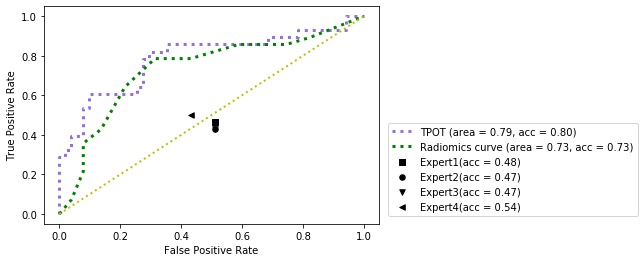

In [56]:
from sklearn import metrics
import matplotlib.pyplot as plt

#plot for tpot
fpr, tpr, thresholds= metrics.roc_curve(Y_test, proba2, pos_label=1)
auc_CT =metrics.auc(fpr, tpr) 
plt.plot(fpr, tpr,
         label='TPOT (area = {0:0.2f}, acc = 0.80)'
         ''.format(auc_CT),
         color='mediumpurple', linestyle=':', linewidth=3)

#plot for hand optimization
fpr, tpr, thresholds= metrics.roc_curve(Y_test, proba1, pos_label=1)
auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr,
         label='Radiomics curve (area = {0:0.2f}, acc = 0.73)'
               ''.format(auc),
         color='green', linestyle=':', linewidth=3)

#plot for expert1
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert1, pos_label=1)
acc_1 = accuracy_score(Y_test, expert1)
plt.scatter(fpr[1],tpr[1], marker = 's', color = 'black', label='Expert1(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert2, pos_label=1)
acc_2 = accuracy_score(Y_test, expert2)
plt.scatter(fpr[1], tpr[1], marker = 'o', color = 'black', label='Expert2(acc = {0:0.2f})'
            ''.format(acc_2), s = 30)

#plot for expert3
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert3, pos_label=1)
acc_3 = accuracy_score(Y_test, expert3)
plt.scatter(fpr[1], tpr[1], marker = 'v', color = 'black', label='Expert3(acc = {0:0.2f})'
            ''.format(acc_3), s = 30)

#plot for expert4
fpr, tpr, thresholds= metrics.roc_curve(Y_test, expert4, pos_label=1)
acc_4 = accuracy_score(Y_test, expert4)
plt.scatter(fpr[1], tpr[1], marker = '<', color = 'black', label='Expert4(acc = {0:0.2f})'
            ''.format(acc_4), s = 30)

plt.plot([0,1],[0,1],color='y',linestyle=':',linewidth=2)

plt.legend(bbox_to_anchor=(1.4,0.25),loc=10)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_brown.jpg',dpi=300, bbox_inches='tight')
plt.show()

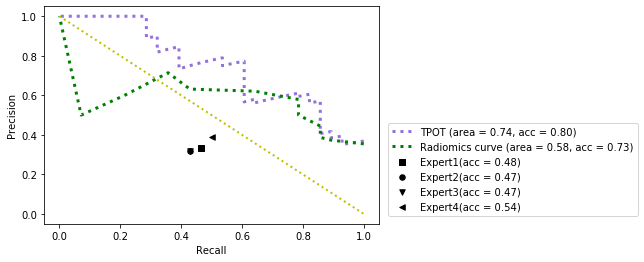

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
outcome = Y_test
#plot for tpot
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, proba2, pos_label=1)
auc_CT =metrics.auc(tpr, fpr) 
plt.plot(tpr, fpr,
         label='TPOT (area = {0:0.2f}, acc = 0.80)'
         ''.format(auc_CT),
         color='mediumpurple', linestyle=':', linewidth=3)

#plot for hand optimization
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, proba1, pos_label=1)
auc = metrics.auc(tpr,fpr)
plt.plot(tpr, fpr,
         label='Radiomics curve (area = {0:0.2f}, acc = 0.73)'
               ''.format(auc),
         color='green', linestyle=':', linewidth=3)

#plot for expert1
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, expert1, pos_label=1)
acc_1 = accuracy_score(outcome, expert1)
plt.scatter(tpr[1],fpr[1], marker = 's', color = 'black', label='Expert1(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, expert2, pos_label=1)
acc_2 = accuracy_score(outcome, expert2)
plt.scatter(tpr[1], fpr[1], marker = 'o', color = 'black', label='Expert2(acc = {0:0.2f})'
            ''.format(acc_2), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, expert3, pos_label=1)
acc_3 = accuracy_score(outcome, expert3)
plt.scatter(tpr[1], fpr[1], marker = 'v', color = 'black', label='Expert3(acc = {0:0.2f})'
            ''.format(acc_3), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, expert4, pos_label=1)
acc_4 = accuracy_score(outcome, expert4)
plt.scatter(tpr[1], fpr[1], marker = '<', color = 'black', label='Expert4(acc = {0:0.2f})'
            ''.format(acc_4), s = 30)

plt.plot([0,1],[1,0],color='y',linestyle=':',linewidth=2)

plt.legend(bbox_to_anchor=(1.4,0.25),loc=10)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('prroc_brown.jpg',dpi=300, bbox_inches='tight')
plt.show()

In [10]:
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.49), float(79))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.34), float(28))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.63), float(51))))

(0.38-0.60)
(0.19-0.53)
(0.49-0.75)


In [10]:
import sys
from scipy.stats import binom_test
#x accuracy
#n = number of trials
#p accuracy compare to 28,51
#83,38,45
x = 0.78
n = 45
p = 0.66

print(binom_test(int(x * n), n, p))

0.11513227400752077


In [96]:
import csv
import pandas as pd
import numpy as np
from tpot import TPOTClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import joblib

file_feature = "./csv/endometrium.csv"
file_train = "./csv/train.csv"
file_validate = "./csv/validation.csv"
file_test = "./csv/test.csv"

f = open(file_feature)
csv_f = csv.reader(f)
features = next(csv_f)
dataset = pd.read_csv(file_feature, names=features, usecols=range(1,6098), dtype=np.float64, skiprows=1, low_memory=False)
f = open(file_train)
csv_f = csv.reader(f)
features = next(csv_f)
dataset_train = pd.read_csv(file_train, names=features, usecols=range(1,1), dtype=np.float64, skiprows=1, low_memory=False)

with open('./csv/train.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    train_list = [row[1] for row in reader]
with open('./csv/validation.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    validation_list = [row['patient'] for row in reader]
with open('./csv/test.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    test_list = [row['patient'] for row in reader]

dataset['outcome'] = pd.to_numeric(dataset['outcome'],errors='coerce')
array_OG = dataset.values
print(array_OG.shape)
train_list = train_list[1:]
validation_list = validation_list[0:]
test_list = test_list[0:]
#print(test_list)
#print(train_list)
#print(validation_list)

def cat_str(num_list):
    n_list = []
    for i in num_list:
        temp = i[12:]
        n_list.append(temp)
    n_list = [int(x) for x in n_list]
    return n_list

train_list = cat_str(train_list)
validation_list = cat_str(validation_list)
test_list = cat_str(test_list)

#print(train_list)
#print(validation_list)
#print(test_list)
#print(len(test_list))

train_feature = []
validate_feature = []
test_feature = []
count = 1
for i in range(len(array_OG)):
    num = i + 1
    if num in train_list:
        train_feature.append(array_OG[i])
    elif num in validation_list:
        validate_feature.append(array_OG[i])
    elif num in test_list:
        #print(count)
        count = count + 1
        test_feature.append(array_OG[i])
        #print(num)
        #print(array_OG[i,6096])
        
train_feature = np.array(train_feature)
validate_feature = np.array(validate_feature)
test_feature = np.array(test_feature)

train_feature = pd.DataFrame(train_feature)
train_feature.dropna(axis=1, thresh=2, inplace=True)
train_feature.dropna(how='all',thresh = 20,inplace=True)
train_feature = np.array(train_feature)
wh_inf = np.isinf(train_feature)
train_feature[wh_inf]=0
wh_nan = np.isnan(train_feature)
train_feature[wh_nan]=0

validate_feature = pd.DataFrame(validate_feature)
validate_feature.dropna(axis=1, thresh=2, inplace=True)
#validate_feature.dropna(how='all',thresh = 20,inplace=True)
validate_feature = np.array(validate_feature)
wh_inf = np.isinf(validate_feature)
validate_feature[wh_inf]=0
wh_nan = np.isnan(validate_feature)
validate_feature[wh_nan]=0

test_feature = pd.DataFrame(test_feature)
test_feature.dropna(axis=1, thresh=2, inplace=True)
#test_feature.dropna(how='all',thresh = 20,inplace=True)
test_feature = np.array(test_feature)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0

#only use image features
X_train = train_feature[:,:6093]
Y_train = train_feature[:,6093]
Y_train = Y_train.astype('int32')

X_validate = validate_feature[:,:6093]
Y_validate = validate_feature[:,6093]
Y_validate = Y_validate.astype('int32')

X_test = test_feature[:,:6093]
Y_test = test_feature[:,6093]
Y_test = Y_test.astype('int32')
seed = 7

np.random.seed(seed)
np.random.shuffle(X_train) 
np.random.seed(seed)
np.random.shuffle(Y_train)

#print(Y_train)

f = open('./csv/reseg_2.csv')
t = csv.reader(f)
features = next(t)
dataset = pd.read_csv('./csv/reseg_2.csv', names=features, usecols=range(1,6098), dtype=np.float64, skiprows=1, low_memory=False)
#dataset['outcome']=pd.to_numeric(dataset['outcome'],errors='coerce')

dataset.dropna(axis=1, thresh=2, inplace=True)
dataset.dropna(how='all',thresh = 20,inplace=True)
dataset = np.array(dataset)
wh_inf = np.isinf(dataset)
dataset[wh_inf]=0
wh_nan = np.isnan(dataset)
dataset[wh_nan]=0

#print(dataset.shape)
wh_inf = np.isinf(dataset)
dataset[wh_inf]=0
wh_nan = np.isnan(dataset)
dataset[wh_nan]=0

features = dataset
X_test = features[:,0:6093]
Y_test = features[:,6093]

print(Y_test)



pipe = joblib.load('./handpkl/EndoBAGRELF20.pkl')
Y_pred = pipe.predict(X_test)
Y_proba = pipe.predict_proba(X_test)
proba1 = np.empty((len(Y_pred),1))
for i in range(len(Y_pred)):
    proba1[i] = Y_proba[i][1]
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, proba1)))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
print(tn,fp,fn,tp)

import sys
#p is proportion of trials that were successes
#n is the number of trials
import math
def adjusted_wald(p, n, z=1.96):
    p_adj = (n * p + (z**2)/2)/(n+z**2)
    n_adj = n + z**2
    span = z * math.sqrt(p_adj*(1-p_adj)/n_adj)
    return max(0, p_adj - span), min(p_adj + span, 1.0)
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.66), float(83))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.53), float(38))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.78), float(45))))

(849, 6097)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
Accuracy: 0.6626506024096386
Average Precision Score: 0.5677446628619742
Kappa: 0.3091557669441142
Hamming Loss: 0.3373493975903614
AUC: 0.7809941520467836
Sensitivity0.5263157894736842
Specificity0.7777777777777778
35 10 18 20
(0.55-0.75)
(0.38-0.68)
(0.64-0.88)


In [108]:

import csv
import pandas as pd
import numpy as np
from tpot import TPOTClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score,precision_recall_curve,auc
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import joblib

file_feature = "./csv/endometrium.csv"
file_train = "./csv/train.csv"
file_validate = "./csv/validation.csv"
file_test = "./csv/test.csv"

f = open(file_feature)
csv_f = csv.reader(f)
features = next(csv_f)
dataset = pd.read_csv(file_feature, names=features, usecols=range(1,6098), dtype=np.float64, skiprows=1, low_memory=False)
f = open(file_train)
csv_f = csv.reader(f)
features = next(csv_f)
dataset_train = pd.read_csv(file_train, names=features, usecols=range(1,1), dtype=np.float64, skiprows=1, low_memory=False)

with open('./csv/train.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    train_list = [row[1] for row in reader]
with open('./csv/validation.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    validation_list = [row['patient'] for row in reader]
with open('./csv/test.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)
    test_list = [row['patient'] for row in reader]

dataset['outcome'] = pd.to_numeric(dataset['outcome'],errors='coerce')
array_OG = dataset.values
print(array_OG.shape)
train_list = train_list[1:]
validation_list = validation_list[0:]
test_list = test_list[0:]
#print(test_list)
#print(train_list)
#print(validation_list)

def cat_str(num_list):
    n_list = []
    for i in num_list:
        temp = i[12:]
        n_list.append(temp)
    n_list = [int(x) for x in n_list]
    return n_list

train_list = cat_str(train_list)
validation_list = cat_str(validation_list)
test_list = cat_str(test_list)

#print(train_list)
#print(validation_list)
#print(test_list)
#print(len(test_list))

train_feature = []
validate_feature = []
test_feature = []
count = 1
for i in range(len(array_OG)):
    num = i + 1
    if num in train_list:
        train_feature.append(array_OG[i])
    elif num in validation_list:
        validate_feature.append(array_OG[i])
    elif num in test_list:
        #print(count)
        count = count + 1
        test_feature.append(array_OG[i])
        #print(num)
        #print(array_OG[i,6096])
        
train_feature = np.array(train_feature)
validate_feature = np.array(validate_feature)
test_feature = np.array(test_feature)

train_feature = pd.DataFrame(train_feature)
train_feature.dropna(axis=1, thresh=2, inplace=True)
train_feature.dropna(how='all',thresh = 20,inplace=True)
train_feature = np.array(train_feature)
wh_inf = np.isinf(train_feature)
train_feature[wh_inf]=0
wh_nan = np.isnan(train_feature)
train_feature[wh_nan]=0

validate_feature = pd.DataFrame(validate_feature)
validate_feature.dropna(axis=1, thresh=2, inplace=True)
#validate_feature.dropna(how='all',thresh = 20,inplace=True)
validate_feature = np.array(validate_feature)
wh_inf = np.isinf(validate_feature)
validate_feature[wh_inf]=0
wh_nan = np.isnan(validate_feature)
validate_feature[wh_nan]=0

test_feature = pd.DataFrame(test_feature)
test_feature.dropna(axis=1, thresh=2, inplace=True)
#test_feature.dropna(how='all',thresh = 20,inplace=True)
test_feature = np.array(test_feature)
wh_inf = np.isinf(test_feature)
test_feature[wh_inf]=0
wh_nan = np.isnan(test_feature)
test_feature[wh_nan]=0

#only use image features
X_train = train_feature[:,:6093]
Y_train = train_feature[:,6093]
Y_train = Y_train.astype('int32')

X_validate = validate_feature[:,:6093]
Y_validate = validate_feature[:,6093]
Y_validate = Y_validate.astype('int32')

X_test = test_feature[:,:6093]
Y_test = test_feature[:,6093]
Y_test = Y_test.astype('int32')
seed = 7

np.random.seed(seed)
np.random.shuffle(X_train) 
np.random.seed(seed)
np.random.shuffle(Y_train)

#print(Y_train)

f = open('./csv/rereseg_2.csv')
t = csv.reader(f)
features = next(t)
dataset = pd.read_csv('./csv/rereseg_2.csv', names=features, usecols=range(1,6098), dtype=np.float64, skiprows=1, low_memory=False)
#dataset['outcome']=pd.to_numeric(dataset['outcome'],errors='coerce')

dataset.dropna(axis=1, thresh=2, inplace=True)
dataset.dropna(how='all',thresh = 20,inplace=True)
dataset = np.array(dataset)
wh_inf = np.isinf(dataset)
dataset[wh_inf]=0
wh_nan = np.isnan(dataset)
dataset[wh_nan]=0

#print(dataset.shape)
wh_inf = np.isinf(dataset)
dataset[wh_inf]=0
wh_nan = np.isnan(dataset)
dataset[wh_nan]=0

features = dataset
X_test = features[:,0:6093]
Y_test = features[:,6093]

print(Y_test)



pipe = joblib.load('./handpkl/EndoBAGRELF20.pkl')
Y_pred = pipe.predict(X_test)
Y_proba = pipe.predict_proba(X_test)
proba1 = np.empty((len(Y_pred),1))
for i in range(len(Y_pred)):
    proba1[i] = Y_proba[i][1]
print("Accuracy: " + repr(accuracy_score(Y_test, Y_pred)))
print("Average Precision Score: " + repr(average_precision_score(Y_test, Y_pred)))
print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
print("AUC: " + repr(roc_auc_score(Y_test, proba1)))
fpr, tpr, _= precision_recall_curve(Y_test,proba1)
print("PRAUC"+repr(auc(tpr,fpr)))
print("Sensitivity" + repr(recall_score(Y_test,Y_pred)))
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
print("Specificity" + repr(tn/(tn+fp)))
print(tn,fp,fn,tp)

import sys
#p is proportion of trials that were successes
#n is the number of trials
import math
def adjusted_wald(p, n, z=1.96):
    p_adj = (n * p + (z**2)/2)/(n+z**2)
    n_adj = n + z**2
    span = z * math.sqrt(p_adj*(1-p_adj)/n_adj)
    return max(0, p_adj - span), min(p_adj + span, 1.0)
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.76), float(83))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.53), float(38))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.80), float(45))))

(849, 6097)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
Accuracy: 0.6746987951807228
Average Precision Score: 0.5798438764130934
Kappa: 0.3324396782841823
Hamming Loss: 0.3253012048192771
AUC: 0.7926900584795321
PRAUC0.7863537860832776
Sensitivity0.5263157894736842
Specificity0.8
36 9 18 20
(0.66-0.84)
(0.38-0.68)
(0.66-0.89)
